In [25]:
# | hide
import pandas as pd 
import pickle

In [26]:
with open('/Users/n0w0f/git/n0w0f/irt-on-bench/data/model_score_dict.pkl', 'rb') as f:
    model_score_dicts = pickle.load(f)

In [27]:
model_score_dicts['overall']['Claude-2-Zero-T']['difficulty']

0       difficulty-basic
1       difficulty-basic
2                    NaN
3                    NaN
4       difficulty-basic
              ...       
2849    difficulty-basic
2850    difficulty-basic
2851                 NaN
2852                 NaN
2853                 NaN
Name: difficulty, Length: 2854, dtype: object

In [28]:
# diffculty could be difficulty-basic , NaN, and difficulty-advanced, assign 0.25, 0.75 and 1 to them respectively
difficulty_dict = {'difficulty-basic': 0.25, 'difficulty-advanced': 1, 'NaN': 0.75}
difficulty_vector = pd.DataFrame(model_score_dicts['overall']['Claude-2-Zero-T']['difficulty'].map(difficulty_dict))
# difficulty_vector = pd.DataFrame(model_score_dicts['overall']).T['difficulty']

In [29]:
# replace all the NaN with 0.75 in difficulty_vector
difficulty_vector.fillna(0.75, inplace=True)

In [31]:
difficulty_vector
# create a dict with 3 keys, easy intermediate and hard and give me the list of ids for each difficulty level
difficulty_dict = {'easy': [], 'intermediate': [], 'hard': []}
for i in range(len(difficulty_vector)):
    if difficulty_vector.iloc[i][0] == 0.25:
        difficulty_dict['easy'].append(difficulty_vector.index[i])
    elif difficulty_vector.iloc[i][0] == 0.75:
        difficulty_dict['intermediate'].append(difficulty_vector.index[i])
    else:
        difficulty_dict['hard'].append(difficulty_vector.index[i])

/var/folders/tw/1gbrp83s7273pmjr95nyvj800000gn/T/ipykernel_10898/2612286288.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if difficulty_vector.iloc[i][0] == 0.25:
/var/folders/tw/1gbrp83s7273pmjr95nyvj800000gn/T/ipykernel_10898/2612286288.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif difficulty_vector.iloc[i][0] == 0.75:


In [33]:
#save the difficulty dict as json
import json
with open('/Users/n0w0f/git/n0w0f/irt-on-bench/data/difficulty_dict.json', 'w') as f:
    json.dump(difficulty_dict, f)

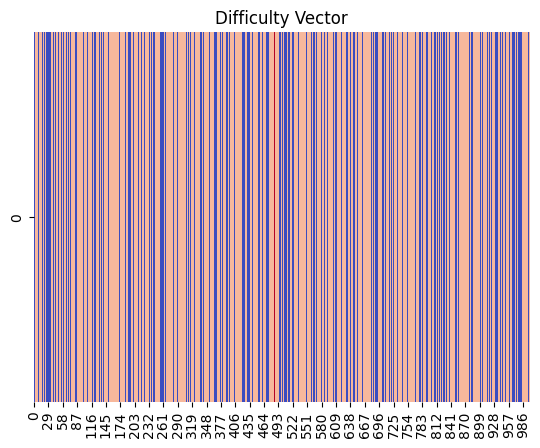

In [23]:
# plot difficult vector as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vector_as_heatmap(vector, title):
    vector_2d = vector.values.reshape(-1, 1)  # Reshape to 2D matrix
    sns.heatmap(vector_2d.T, cmap='coolwarm', cbar=False)
    plt.title(title)
    plt.show()

plot_vector_as_heatmap(difficulty_vector[:1000], 'Difficulty Vector')

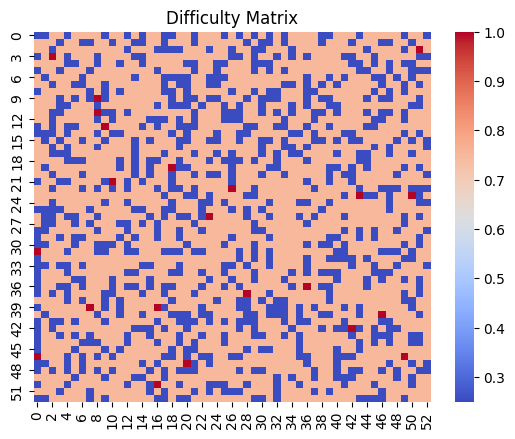

Used 2809 elements out of 2854


In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vector_as_square_heatmap(vector, title):
    # Calculate the size of the square matrix
    n = int(np.sqrt(len(vector)))
    # Reshape first n^2 elements into square matrix
    matrix = vector[:n*n].values.reshape(n, n)
    
    sns.heatmap(matrix, cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()
    
    return n*n  # Return number of elements used

used_elements = plot_vector_as_square_heatmap(difficulty_vector, 'Difficulty Matrix')
print(f"Used {used_elements} elements out of {len(difficulty_vector)}")

In [17]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [34]:
# read pickle file
with open('/Users/n0w0f/git/n0w0f/irt-on-bench/data/trace.pkl', 'rb') as f:
    trace = pickle.load(f)

In [36]:
difficulties_mean = trace.posterior['difficulties'].mean(dim=['chain', 'draw']).values


In [38]:
len(difficulties_mean)

1614